<a href="https://colab.research.google.com/github/kangtaehotim/predict/blob/master/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

     |████████████████████████████████| 112 kB 8.9 MB/s 


In [ ]:
import pyupbit

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2022-04-27 18:00:00,49537000.0,49654000.0,49369000.0,49640000.0,90.036315,4.460613e+09
2022-04-27 19:00:00,49641000.0,49753000.0,49517000.0,49694000.0,78.337746,3.890062e+09
2022-04-27 20:00:00,49703000.0,49745000.0,49250000.0,49564000.0,144.100780,7.130127e+09
2022-04-27 21:00:00,49565000.0,49712000.0,49468000.0,49491000.0,107.072810,5.310218e+09
2022-04-27 22:00:00,49498000.0,50037000.0,49380000.0,49907000.0,220.106856,1.095769e+10
...,...,...,...,...,...,...
2022-05-05 21:00:00,50466000.0,50555000.0,50451000.0,50487000.0,61.700424,3.116433e+09
2022-05-05 22:00:00,50462000.0,50500000.0,50001000.0,50019000.0,180.618186,9.071191e+09
2022-05-05 23:00:00,50019000.0,50080000.0,49186000.0,49301000.0,608.511110,3.017246e+10
2022-05-06 00:00:00,49301000.0,49321000.0,47857000.0,48037000.0,1792.710800,8.669163e+10


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-04-27 18:00:00,49640000.0
1,2022-04-27 19:00:00,49694000.0
2,2022-04-27 20:00:00,49564000.0
3,2022-04-27 21:00:00,49491000.0
4,2022-04-27 22:00:00,49907000.0
...,...,...
195,2022-05-05 21:00:00,50487000.0
196,2022-05-05 22:00:00,50019000.0
197,2022-05-05 23:00:00,49301000.0
198,2022-05-06 00:00:00,48037000.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

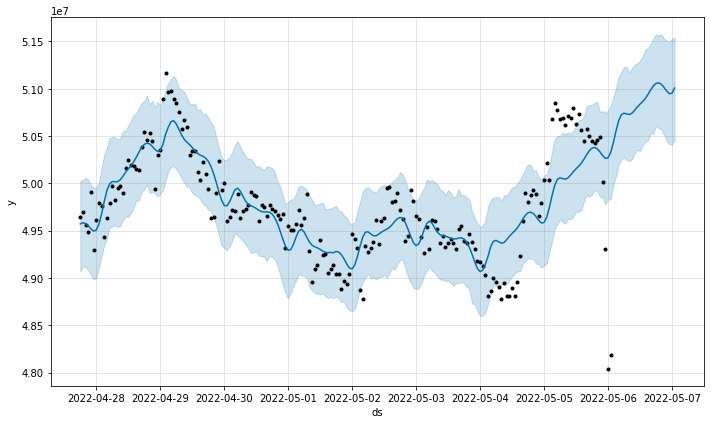

In [ ]:
#그래프1
fig1 = model.plot(forecast)

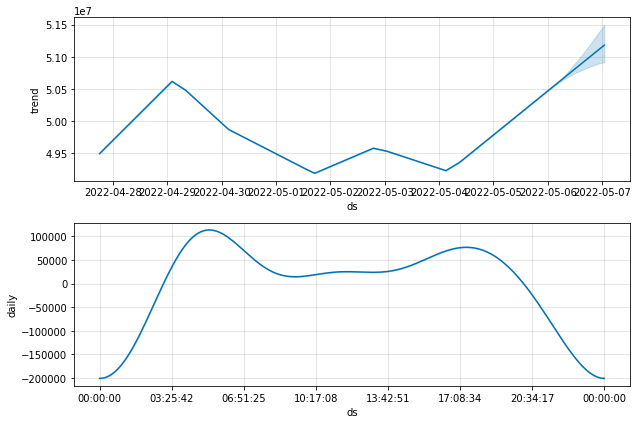

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

In [ ]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

48190000.0

In [ ]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

50741574.0113038

In [ ]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  48190000.0
종가의 가격:  50741574.0113038


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-27 18:00:00,4.949733e+07,4.906948e+07,5.002467e+07,4.949733e+07,4.949733e+07,73538.147896,73538.147896,73538.147896,73538.147896,73538.147896,73538.147896,0.0,0.0,0.0,4.957087e+07
1,2022-04-27 19:00:00,4.953239e+07,4.912530e+07,5.003749e+07,4.953239e+07,4.953239e+07,51461.857198,51461.857198,51461.857198,51461.857198,51461.857198,51461.857198,0.0,0.0,0.0,4.958385e+07
2,2022-04-27 20:00:00,4.956745e+07,4.911699e+07,5.005874e+07,4.956745e+07,4.956745e+07,8450.967659,8450.967659,8450.967659,8450.967659,8450.967659,8450.967659,0.0,0.0,0.0,4.957591e+07
3,2022-04-27 21:00:00,4.960252e+07,4.907716e+07,5.003865e+07,4.960252e+07,4.960252e+07,-51765.628565,-51765.628565,-51765.628565,-51765.628565,-51765.628565,-51765.628565,0.0,0.0,0.0,4.955075e+07
4,2022-04-27 22:00:00,4.963758e+07,4.903415e+07,4.998379e+07,4.963758e+07,4.963758e+07,-119554.035486,-119554.035486,-119554.035486,-119554.035486,-119554.035486,-119554.035486,0.0,0.0,0.0,4.951803e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2022-05-06 21:00:00,5.106833e+07,5.051496e+07,5.153474e+07,5.087631e+07,5.130726e+07,-51765.628565,-51765.628565,-51765.628565,-51765.628565,-51765.628565,-51765.628565,0.0,0.0,0.0,5.101656e+07
220,2022-05-06 22:00:00,5.109681e+07,5.045047e+07,5.150574e+07,5.088959e+07,5.135442e+07,-119554.035486,-119554.035486,-119554.035486,-119554.035486,-119554.035486,-119554.035486,0.0,0.0,0.0,5.097726e+07
221,2022-05-06 23:00:00,5.112529e+07,5.041754e+07,5.149689e+07,5.090244e+07,5.140327e+07,-176960.676391,-176960.676391,-176960.676391,-176960.676391,-176960.676391,-176960.676391,0.0,0.0,0.0,5.094833e+07
222,2022-05-07 00:00:00,5.115377e+07,5.040627e+07,5.152748e+07,5.091154e+07,5.145154e+07,-200869.271194,-200869.271194,-200869.271194,-200869.271194,-200869.271194,-200869.271194,0.0,0.0,0.0,5.095290e+07
